In [15]:
!date
!sudo apt update
!sudo apt list --upgradable
!sudo apt install google-cloud-sdk
!sudo apt install python3-google-compute-engine
!sudo apt install python3-pip
!sudo pip3 --version
!sudo pip3 install numpy
!sudo pip3 install pandas
!sudo pip3 install matplotlib
!sudo pip3 install tensorflow


Mon Apr 29 02:41:04 UTC 2019


In [1]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
print(tf.__version__)

2.0.0


Using TensorFlow backend.


In [2]:
!pwd

/Users/basillatif/Desktop


In [5]:
#data1 = pd.read_csv("/home/rick_selby/SupplyChainDataRev3.csv", skiprows = 0)
data1 = pd.read_csv("london_merged.csv", skiprows = 0)
#Data cleaning
#data1.dropna() 
data1.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
data1['cnt'].median()

844.0

In [7]:
data1.loc[data1['cnt'] < 844, 'cnt_group'] = 0 #low 
data1.loc[data1['cnt'] > 844, 'cnt_group'] = 1 #medium
data1 = data1[np.isfinite(data1['cnt_group'])]
data1.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_group
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,0.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,0.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,0.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0,0.0


In [8]:
data1.cnt_group.unique()

array([0., 1.])

In [9]:
data1nparray = data1.values

In [10]:
TrainData   = data1nparray[:, 2:10] #given all the variables 
TrainLabels = data1nparray[:,[10]] #can we predict the count group 

In [11]:
TrainData

array([[3.0, 2.0, 93.0, ..., 0.0, 1.0, 3.0],
       [3.0, 2.5, 93.0, ..., 0.0, 1.0, 3.0],
       [2.5, 2.5, 96.5, ..., 0.0, 1.0, 3.0],
       ...,
       [5.5, 1.5, 78.5, ..., 0.0, 0.0, 3.0],
       [5.5, 1.5, 76.0, ..., 0.0, 0.0, 3.0],
       [5.0, 1.0, 76.0, ..., 0.0, 0.0, 3.0]], dtype=object)

In [12]:
TrainLabels

array([[0.0],
       [0.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [13]:
TrainData.astype('float64')
TrainLabels.astype('float64')

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
#TrainData_array = np.asarray(TrainData)
#TrainLabels_array = np.asarray(TrainLabels)
TrainData = tf.convert_to_tensor(TrainData, np.float32)
TrainLabels = tf.convert_to_tensor(TrainLabels, np.float32)


In [15]:
model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(1, 6)),
    keras.layers.Dense(50, activation=tf.nn.softmax),
    keras.layers.Dense(60, activation=tf.nn.relu)
    #keras.layers.Dense(70, activation=tf.nn.tanh),
    #keras.layers.Dense(10, activation=tf.nn.relu)
    #relu, softmax, tanh
])

In [16]:
#model = Sequential()
#model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
#model.add(Activation('softmax'))
model.compile(optimizer='adam', #optimizer='sgd',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])

In [17]:
model.fit(TrainData, TrainLabels, epochs=10)

Train on 17405 samples
Epoch 1/100
17405/17405 [==============================] - 2s 103us/sample - loss: 0.8064 - accuracy: 0.6720
Epoch 2/100
17405/17405 [==============================] - 1s 71us/sample - loss: 0.5686 - accuracy: 0.7138
Epoch 3/100
17405/17405 [==============================] - 1s 79us/sample - loss: 0.5424 - accuracy: 0.7208
Epoch 4/100
17405/17405 [==============================] - 2s 136us/sample - loss: 0.5344 - accuracy: 0.7240 - loss: 0.5324 - 
Epoch 5/100
17405/17405 [==============================] - 1s 70us/sample - loss: 0.5563 - accuracy: 0.7123
Epoch 6/100
17405/17405 [==============================] - 1s 64us/sample - loss: 0.5585 - accuracy: 0.7100
Epoch 7/100
17405/17405 [==============================] - 1s 53us/sample - loss: 0.5448 - accuracy: 0.7150s - loss: 0.5465 - accuracy
Epoch 8/100
17405/17405 [==============================] - 1s 69us/sample - loss: 0.5387 - accuracy: 0.7173s - l
Epoch 9/100
17405/17405 [==============================] - 2s

KeyboardInterrupt: 

In [ ]:
train_loss, train_acc = model.evaluate(TrainData, TrainLabels)

print('Train accuracy:', train_acc)


In [446]:
predictions = model.predict(TrainData)


In [322]:
class_names = ['Unknown', 'Platinum', 'Gold', 'Silver', 'Tin']


In [158]:
def plot_image(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  


  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(True)
  plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


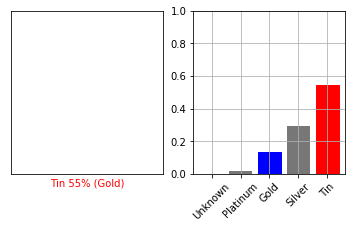

In [159]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, TrainLabels)
plt.subplot(1,2,2)
plot_value_array(i, predictions, TrainLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [160]:
predictions[0]


array([5.1178347e-05, 1.9150006e-02, 1.3676651e-01, 2.9645699e-01,
       5.4757535e-01], dtype=float32)

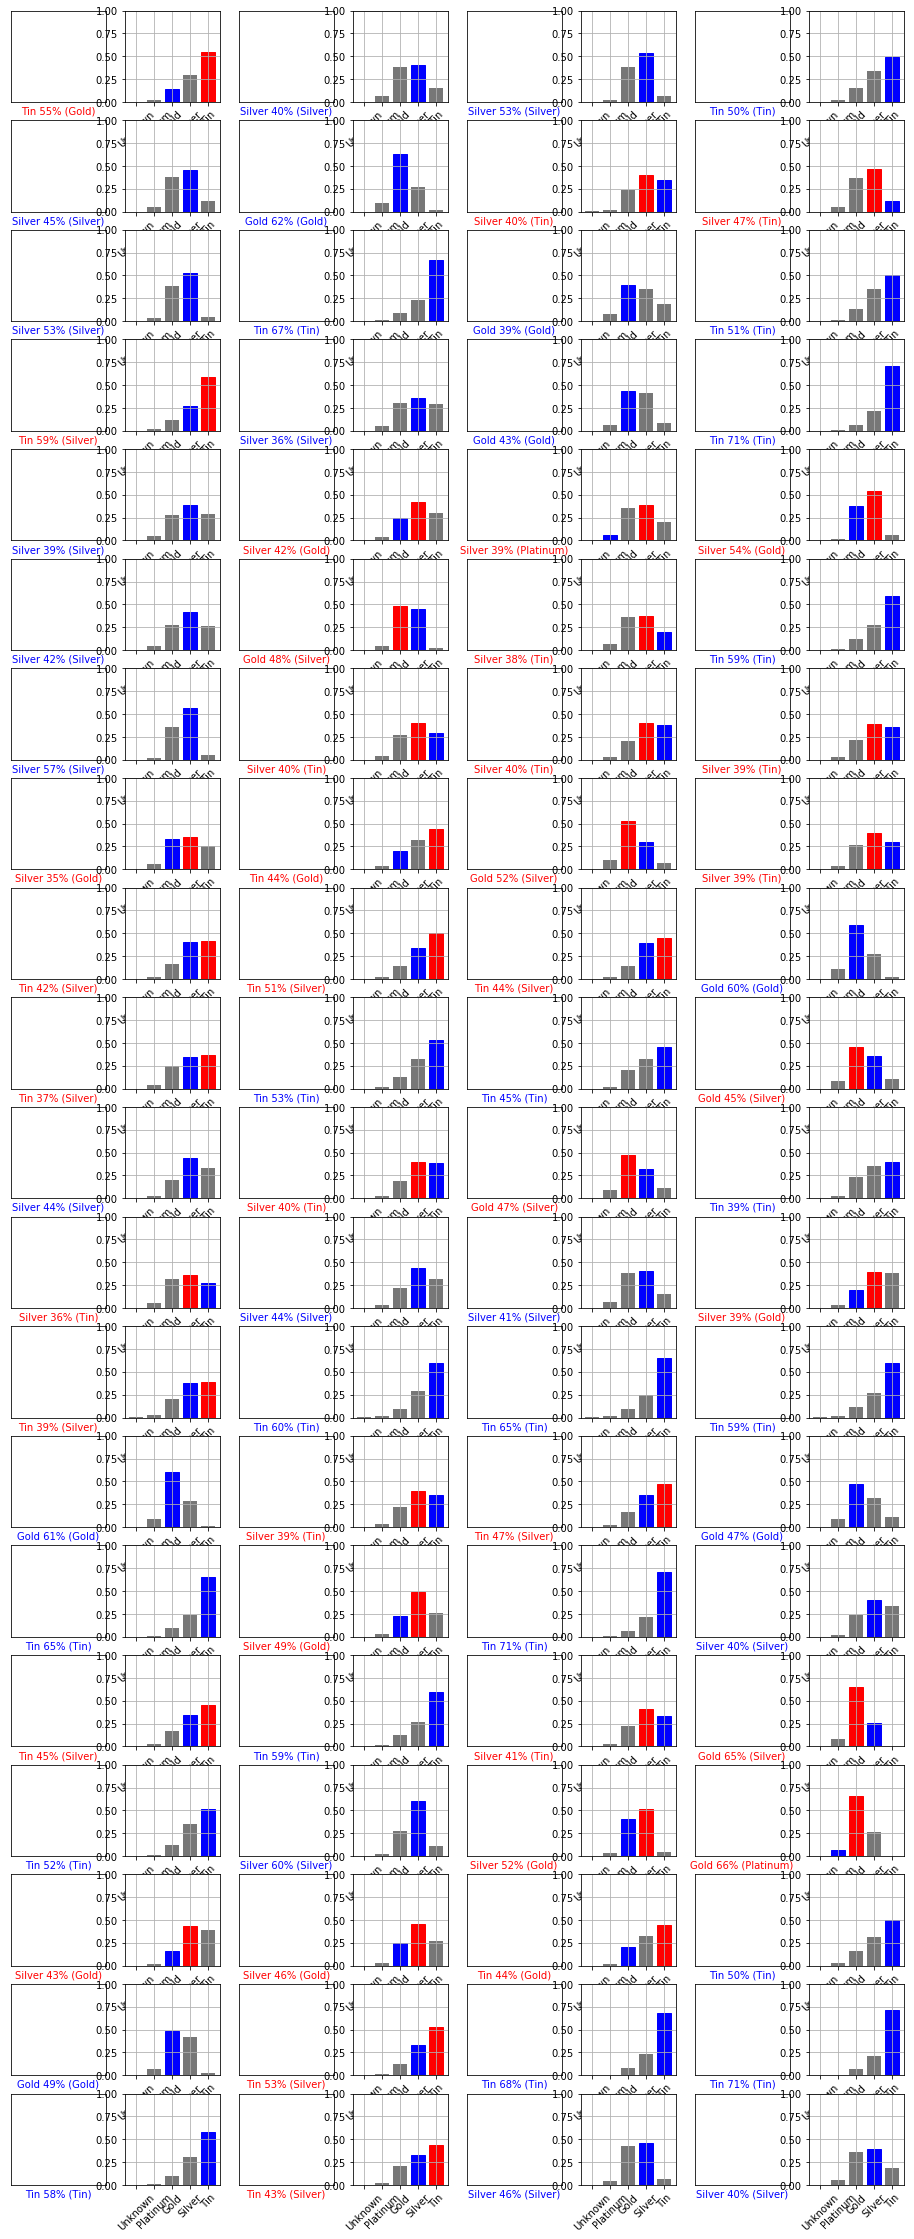

In [161]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, TrainLabels)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, TrainLabels)
  plt.xticks(range(5), class_names, rotation=45)
plt.show()


In [162]:
layer0 = model.get_layer(index=0)


In [163]:
layer0.get_weights()

[array([[ 1.59191146e-01, -2.45689247e-02,  1.88101783e-01,
          2.06634894e-01, -4.06571180e-02,  2.01666743e-01,
          1.39619172e-01,  2.60796137e-02,  1.96340606e-01,
          9.88637879e-02, -2.59870619e-01,  2.56575763e-01,
          8.96476358e-02,  8.45530108e-02, -3.03730238e-02,
          1.22854300e-02, -4.25260365e-02,  9.20404941e-02,
         -9.15224850e-03,  3.01701516e-01,  3.37976307e-01,
          2.43850220e-02,  1.27810821e-01, -7.89425522e-02,
         -1.64343685e-01, -1.20413750e-02,  7.56117478e-02,
          1.58402771e-01,  6.46263361e-02,  8.60600173e-02,
          1.01325929e-01, -1.25876188e-01, -4.08983320e-01,
         -3.05246748e-02,  1.77365348e-01,  2.21575037e-01,
          7.78997922e-03,  2.43453100e-01,  2.55755991e-01,
          9.37136337e-02,  1.74944595e-01,  2.29125414e-02,
          3.22316960e-03, -1.38397694e-01,  1.26758236e-02,
         -6.85230643e-02, -1.83067650e-01, -1.27665680e-02,
         -4.89251642e-03, -4.49111164e-0

In [164]:
layer1 = model.get_layer(index=1)

In [165]:
layer1.get_weights()

[array([[-0.1392476 , -0.00434492, -0.08477404, ...,  0.05039312,
         -0.08415505,  0.1266518 ],
        [-0.01931728, -0.04289204,  0.03674281, ...,  0.04078376,
          0.25759628, -0.05511492],
        [ 0.04294409,  0.04702023, -0.08914112, ...,  0.21000056,
          0.22924535,  0.10956185],
        ...,
        [ 0.08059888,  0.14753838, -0.09467171, ..., -0.05938225,
          0.2973876 ,  0.09935327],
        [-0.04017137,  0.11158904, -0.04889911, ...,  0.10226376,
         -0.0657802 ,  0.1411869 ],
        [ 0.22655661, -0.06400165,  0.14446017, ...,  0.06482833,
          0.25475633,  0.059039  ]], dtype=float32),
 array([ 0.09313586,  0.04301597, -0.01231007,  0.07096907,  0.03813786,
         0.1393451 , -0.0563246 ], dtype=float32)]

In [166]:
#predictionsDF = pd.DataFrame(
#    data=predictions[1:,1:],    # values
#    index=predictions[1:,0],    # 1st column as index
#    columns=predictions[0,1:])  # 1st row as the column names

predictionsDF = pd.DataFrame(
    data=predictions)


In [167]:
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=False, index=False)


In [168]:
PredictedLabels = np.ndarray.copy(TrainLabels)
PredictedOutcomes = np.ndarray.copy(TrainLabels)
for i in range(len(TrainLabels)):
  PredictedLabels[i] = np.argmax(predictions[i])
  if PredictedLabels[i] == TrainLabels[i]:
    PredictedOutcomes[i] = 1
  else:
    PredictedOutcomes[i] = 0


In [169]:
TrainDataLabels = np.append(TrainData, TrainLabels, axis=1)
TrainDataLabelsPredictions = np.append(TrainDataLabels, PredictedLabels, axis=1)
TrainDataLabelsPredictionsOutcomes = np.append(TrainDataLabelsPredictions, PredictedOutcomes, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)


In [170]:
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb)

In [171]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=False, index=False)

In [172]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SinglePrediction = model.predict(SingleObservation)

In [173]:
SinglePrediction[0]

array([5.3717808e-06, 6.8506218e-02, 5.9757257e-01, 3.3309418e-01,
       8.2165009e-04], dtype=float32)

In [174]:
np.max(SinglePrediction[0])

0.59757257

In [175]:
np.argmax(SinglePrediction[0])

2

In [176]:
class_names[np.argmax(SinglePrediction[0])]

'Gold'

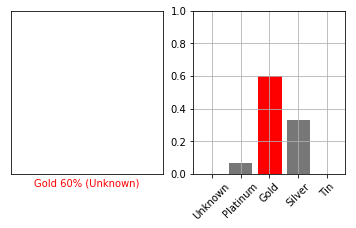

In [177]:
BlankLabels = np.array([[0, 0, 0, 0, 0]])

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, SinglePrediction, BlankLabels)
plt.subplot(1,2,2)
plot_value_array(i, SinglePrediction, BlankLabels)
plt.xticks(range(5), class_names, rotation=45)
plt.show()

In [178]:
!date

Mon Apr 29 03:35:33 UTC 2019
